#### 1 Импорт и анализ таблиц

#### 1.1 Импортируем данные в окружение Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df_date = pd.read_excel("Приложение А_Датасет.xlsx", sheet_name = "Данные")
df_clients = pd.read_excel("Приложение А_Датасет.xlsx", sheet_name = "Clients")
df_reg_dict = pd.read_excel("Приложение А_Датасет.xlsx", sheet_name = "Region_dict")

#### 1.2 Изучаем все три таблицы и проверяем их на наличие пустых значений.

In [3]:
df_date

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000
...,...,...,...,...
38686,283582,185826.0,3702.0,2022-08-22 02:22:41.588000
38687,174414,187403.0,3284.0,2022-10-01 14:35:56.818000
38688,113060,184674.0,3708.0,2022-07-17 10:23:57.530000
38689,218517,208436.0,1983.0,2022-11-12 17:05:48.765000


In [4]:
df_date.describe()

,id_order,id_client,amt_payment
count,38691.000000,38103.000000,36536.000000
mean,198845.382544,194087.384720,3540.766203
std,57156.443394,8973.986378,1427.298727
min,100238.000000,178561.000000,498.000000
25%,149286.500000,186346.500000,2579.000000
50%,198972.000000,194077.000000,3468.000000
75%,248424.500000,201842.500000,4387.000000
max,297607.000000,209634.000000,7633.000000


In [5]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38691 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     38691 non-null  int64  
 1   id_client    38103 non-null  float64
 2   amt_payment  36536 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
df_clients

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [7]:
df_clients.describe()

,id_client,nflag_test,id_trading_point
count,55605.000000,55605.000000,55605.000000
mean,227974.818344,0.463879,1095.527363
std,45272.325725,0.498698,1642.650476
min,178561.000000,0.000000,1.000000
25%,192462.000000,0.000000,112.000000
50%,206364.000000,0.000000,516.000000
75%,262665.000000,1.000000,1101.000000
max,331964.000000,1.000000,9931.000000


In [8]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [9]:
df_reg_dict

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [10]:
df_reg_dict.describe()

,id_trading_point
count,66.000000
mean,1080.530303
std,2093.571422
min,1.000000
25%,66.750000
50%,416.500000
75%,897.750000
max,9931.000000


In [11]:
df_reg_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


#### 1.3 Исключаем из таблиц все строки, в которых есть “нулловые” значения.

In [12]:
df_date.isnull().any()

id_order       False
id_client       True
amt_payment     True
dtime_pay       True
dtype: bool

In [13]:
df_date = df_date[~((df_date['id_client'].isnull()) | (df_date['amt_payment'].isnull()) | (df_date['dtime_pay'].isnull()))]

In [14]:
df_date

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000
...,...,...,...,...
38686,283582,185826.0,3702.0,2022-08-22 02:22:41.588000
38687,174414,187403.0,3284.0,2022-10-01 14:35:56.818000
38688,113060,184674.0,3708.0,2022-07-17 10:23:57.530000
38689,218517,208436.0,1983.0,2022-11-12 17:05:48.765000


In [15]:
df_clients.isnull().any()

id_client           False
dtime_ad             True
nflag_test          False
id_trading_point    False
dtype: bool

In [16]:
df_clients = df_clients[~(df_clients['dtime_ad'].isnull())]

In [17]:
df_clients

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
5,254313,2022-06-19 22:18:01.770,1,453
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [18]:
df_reg_dict.isnull().any()

id_trading_point    False
city                False
dtype: bool

#### 1.4 Исследуем количество торговых точек в каждом городе - строим группировку по количеству в каждом городе и визуализируем с помощью гистограммы.

In [19]:
df_rd_gr = df_reg_dict.groupby('city').count()['id_trading_point'].reset_index().sort_values(by = 'id_trading_point')
df_rd_gr

,city,id_trading_point
0,Великий Новгород,1
20,Тюмень,1
19,Тольятти,1
17,Сахалинск,1
13,Ростов-на-Дону,1
12,Ростов Великий,1
21,Чехов,1
9,Нижний Новгород,1
11,Петрозаводск,1
3,Дмитров,1


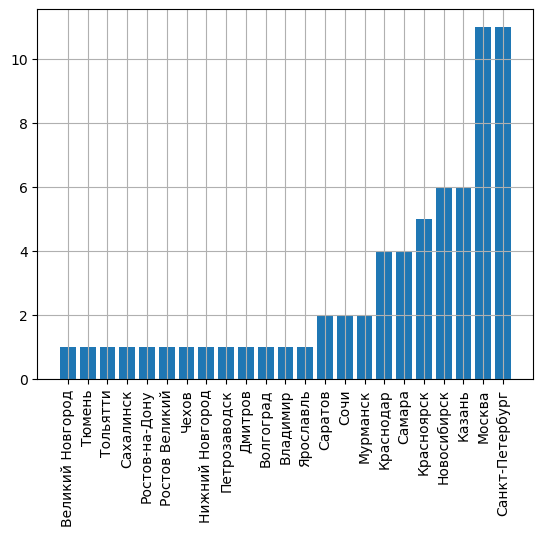

In [20]:
plt.bar(df_rd_gr['city'], df_rd_gr['id_trading_point'])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

#### 2 Объединение таблиц

#### 2.1 У одного клиента может быть несколько платежей. Строим агрегацию таблицы с платежами, где вычисяем сумму платежей на каждого клиента.

In [21]:
df_cl_pay = df_date.groupby('id_client').agg({'id_order':'count', 'amt_payment':'sum'}).reset_index()
df_cl_pay = df_cl_pay.rename(columns={"id_order": "ord_cnt", "amt_payment": "pay_sum"})
df_cl_pay

,id_client,ord_cnt,pay_sum
0,178561.0,1,3052.0
1,178562.0,1,2439.0
2,178563.0,1,768.0
3,178565.0,1,958.0
4,178566.0,1,5474.0
...,...,...,...
29014,209630.0,1,6927.0
29015,209631.0,1,2090.0
29016,209632.0,1,2775.0
29017,209633.0,1,1673.0


In [22]:
# df_cl_gr = df_clients.groupby(['id_client', 'id_trading_point', 'city']).agg(['id_order':'count', 'amt_payment':'sum'].reset_index())

#### 2.2 Соединяем (по клиенту) сгруппированную таблицу с платежами с клиентской таблицей. Убеждаемся, что в таблице остались все клиенты из клиентской таблицы.

In [23]:
df_cl = df_cl_pay.merge(df_clients, on = 'id_client', how = 'outer')
df_cl

,id_client,ord_cnt,pay_sum,dtime_ad,nflag_test,id_trading_point
0,178561.0,1.0,3052.0,2022-06-03 02:47:49.183,0.0,453.0
1,178562.0,1.0,2439.0,2022-06-03 02:51:21.878,0.0,2652.0
2,178563.0,1.0,768.0,2022-06-03 02:52:10.616,1.0,112.0
3,178565.0,1.0,958.0,2022-06-03 02:55:13.525,1.0,739.0
4,178566.0,1.0,5474.0,2022-06-03 02:58:38.370,0.0,866.0
...,...,...,...,...,...,...
55568,331831.0,NaN,NaN,2022-07-01 04:28:28.282,0.0,55.0
55569,211355.0,NaN,NaN,2022-08-03 02:00:09.287,0.0,82.0
55570,260405.0,NaN,NaN,2022-08-15 02:47:58.960,0.0,576.0
55571,244069.0,NaN,NaN,2022-08-08 00:12:31.319,1.0,991.0


In [24]:
print(df_clients.nunique()['id_client'])
print(df_cl.nunique()['id_client'])

55356
55573


#### 2.3 Заполняем нулями суммы покупок тех клиентов, которые их не совершали

In [25]:
df_cl['ord_cnt'] = df_cl['ord_cnt'].fillna(0)
df_cl['pay_sum'] = df_cl['pay_sum'].fillna(0)
df_cl

,id_client,ord_cnt,pay_sum,dtime_ad,nflag_test,id_trading_point
0,178561.0,1.0,3052.0,2022-06-03 02:47:49.183,0.0,453.0
1,178562.0,1.0,2439.0,2022-06-03 02:51:21.878,0.0,2652.0
2,178563.0,1.0,768.0,2022-06-03 02:52:10.616,1.0,112.0
3,178565.0,1.0,958.0,2022-06-03 02:55:13.525,1.0,739.0
4,178566.0,1.0,5474.0,2022-06-03 02:58:38.370,0.0,866.0
...,...,...,...,...,...,...
55568,331831.0,0.0,0.0,2022-07-01 04:28:28.282,0.0,55.0
55569,211355.0,0.0,0.0,2022-08-03 02:00:09.287,0.0,82.0
55570,260405.0,0.0,0.0,2022-08-15 02:47:58.960,0.0,576.0
55571,244069.0,0.0,0.0,2022-08-08 00:12:31.319,1.0,991.0


#### 2.4 С помощью словаря регионов подтягиваем к каждой торговой точке город, в котором она находится.

In [26]:
df_cl_city = df_cl.merge(df_reg_dict, on = 'id_trading_point')
df_cl_city

,id_client,ord_cnt,pay_sum,dtime_ad,nflag_test,id_trading_point,city
0,178561.0,1.0,3052.0,2022-06-03 02:47:49.183,0.0,453.0,Санкт-Петербург
1,178567.0,1.0,2663.0,2022-06-03 03:02:56.855,0.0,453.0,Санкт-Петербург
2,187264.0,1.0,3769.0,2022-06-24 15:11:16.453,1.0,453.0,Санкт-Петербург
3,187283.0,1.0,2296.0,2022-06-24 16:33:55.167,1.0,453.0,Санкт-Петербург
4,187285.0,1.0,1978.0,2022-06-24 16:44:29.136,1.0,453.0,Санкт-Петербург
...,...,...,...,...,...,...,...
55351,287702.0,0.0,0.0,2022-06-16 04:48:54.608,1.0,13.0,Нижний Новгород
55352,264861.0,0.0,0.0,2022-08-02 15:19:29.105,1.0,13.0,Нижний Новгород
55353,313035.0,0.0,0.0,2022-07-04 06:41:10.203,0.0,13.0,Нижний Новгород
55354,312740.0,0.0,0.0,2022-06-11 17:49:49.701,1.0,13.0,Нижний Новгород


#### 2.5 Создаем поле флаг платежа, который принимает значения 0 или 1 в зависимости от того, заплатил клиент или нет.

In [27]:
df_cl_city['flag_paid'] = np.where(df_cl_city['pay_sum'] > 0, 1, 0)
df_cl_city

,id_client,ord_cnt,pay_sum,dtime_ad,nflag_test,id_trading_point,city,flag_paid
0,178561.0,1.0,3052.0,2022-06-03 02:47:49.183,0.0,453.0,Санкт-Петербург,1
1,178567.0,1.0,2663.0,2022-06-03 03:02:56.855,0.0,453.0,Санкт-Петербург,1
2,187264.0,1.0,3769.0,2022-06-24 15:11:16.453,1.0,453.0,Санкт-Петербург,1
3,187283.0,1.0,2296.0,2022-06-24 16:33:55.167,1.0,453.0,Санкт-Петербург,1
4,187285.0,1.0,1978.0,2022-06-24 16:44:29.136,1.0,453.0,Санкт-Петербург,1
...,...,...,...,...,...,...,...,...
55351,287702.0,0.0,0.0,2022-06-16 04:48:54.608,1.0,13.0,Нижний Новгород,0
55352,264861.0,0.0,0.0,2022-08-02 15:19:29.105,1.0,13.0,Нижний Новгород,0
55353,313035.0,0.0,0.0,2022-07-04 06:41:10.203,0.0,13.0,Нижний Новгород,0
55354,312740.0,0.0,0.0,2022-06-11 17:49:49.701,1.0,13.0,Нижний Новгород,0


#### 3 Автоматизация статистических вычислений

#### 3.1 Создаем функцию test_calc, которая будет вычислять значение t-критерия (критерия Стьюдента) и p_value для сравнения средних и с помощью функции print выводить сообщение о том, существует ли разница между средними (на основании p_value).
#### Аргументы функции: r1 (первая выборка), r2 (вторая выборка), alpha (уровень значимости - имеет значение по умолчанию 5%).

In [28]:
def test_calc(r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1, r2)
    if p < alpha:
        print('Cредние не равны')
        print('Разница средних = ', r1.mean()-r2.mean())
    else:
        print('Cредние равны')
        print('Разница средних = 0')
    return s,p

#### 3.2 Создаем функцию mann_whitney_func, которая будет рассчитывать значение критерия Манна Уитни и p_value для сравнения распределений и с помощью функции print выводить сообщение о том, существует ли разница между средними (на основании p_value).
#### Аргументы функции: r1 (первая выборка), r2 (вторая выборка), alpha (уровень значимости - имеет значение по умолчанию 5%).

In [29]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p<alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
        
    return s, p

#### 4 Чистка неверно заполненных точек

#### 4.1 Создаем пустой список. Запускаем цикл по всем торговым точкам и добавляем к этому списку все торговые точки, в которых не было заплачено ни одного рубля ни одним клиентом.

In [30]:
# df_loc = df_cl_city.mean(numeric_only=False)

zero_pay_tp = []
for i in df_cl_city['id_trading_point'].unique():
#    df_loc = df_cl_city.mean(numeric_only=False)
    df_loc = df_cl_city[df_cl_city['id_trading_point']==i]
    sum_a = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==0)].sum()['pay_sum'].sum()
    sum_b = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==1)].sum()['pay_sum'].sum()
    if (sum_a==0) | (sum_b==0):
        zero_pay_tp.append(i)
print(zero_pay_tp)

C:\Users\пк\AppData\Local\Temp\ipykernel_1748\3714987955.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==0)].sum()['pay_sum'].sum()
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\3714987955.py:8: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==1)].sum()['pay_sum'].sum()
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\3714987955.py:7: FutureWarning: The default value of

[739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 26.0, 7.0, 23.0, 4.0, 1.0, 13.0]


C:\Users\пк\AppData\Local\Temp\ipykernel_1748\3714987955.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==0)].sum()['pay_sum'].sum()
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\3714987955.py:8: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==1)].sum()['pay_sum'].sum()
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\3714987955.py:7: FutureWarning: The default value of

#### 4.2 Создаем еще один пустой список. Запускаем цикл по всем торговым точкам и добавляем к этому списку все торговые точки, в которых пустует или контрольная, или тестовая группа.

In [31]:
empty_nflag_test = []
for i in df_cl_city['id_trading_point'].unique():
    c_a = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==0)].count()['id_client']
    c_b = df_cl_city[(df_cl_city['id_trading_point']==i) & (df_cl_city['nflag_test']==1)].count()['id_client']
    if (c_a==0) | (c_b==0):
        empty_nflag_test.append(i)
print(empty_nflag_test)

[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


#### 5 Расчет общих результатов АБ Теста

#### 5.1 Отбрасываем все торговые точки, которые были обнаружены в пункте 4.

In [32]:
df_cl_city = df_cl_city[~df_cl_city['id_trading_point'].isin(zero_pay_tp + empty_nflag_test)]
df_cl_city

,id_client,ord_cnt,pay_sum,dtime_ad,nflag_test,id_trading_point,city,flag_paid
0,178561.0,1.0,3052.0,2022-06-03 02:47:49.183,0.0,453.0,Санкт-Петербург,1
1,178567.0,1.0,2663.0,2022-06-03 03:02:56.855,0.0,453.0,Санкт-Петербург,1
2,187264.0,1.0,3769.0,2022-06-24 15:11:16.453,1.0,453.0,Санкт-Петербург,1
3,187283.0,1.0,2296.0,2022-06-24 16:33:55.167,1.0,453.0,Санкт-Петербург,1
4,187285.0,1.0,1978.0,2022-06-24 16:44:29.136,1.0,453.0,Санкт-Петербург,1
...,...,...,...,...,...,...,...,...
54171,254386.0,0.0,0.0,2022-08-16 18:01:45.113,0.0,73.0,Сочи,0
54172,330510.0,0.0,0.0,2022-07-25 10:18:08.087,1.0,73.0,Сочи,0
54173,290913.0,0.0,0.0,2022-06-09 17:51:38.738,1.0,73.0,Сочи,0
54174,230943.0,0.0,0.0,2022-06-17 23:35:15.439,0.0,73.0,Сочи,0


#### 5.2 Изображаем гистограмму платежей, на которой различными цветами изображены группы “тест” и “контроль”.

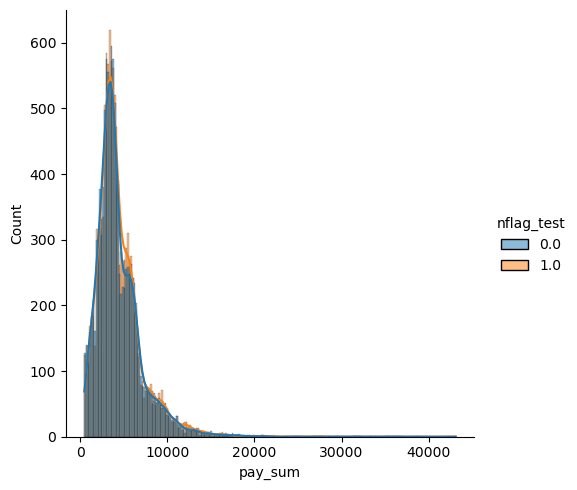

In [33]:
sns.displot(df_cl_city[df_cl_city['pay_sum'] > 0], x = 'pay_sum', hue = 'nflag_test', kde = True)
plt.show()

#### 5.3 Применяем функцию test_calc (сравниваем средние платежи)

In [34]:
test_calc(df_cl_city[df_cl_city['nflag_test']==1]['pay_sum'], df_cl_city[df_cl_city['nflag_test']==0]['pay_sum'])

Cредние не равны
Разница средних =  158.91123610796285


(5.663915722973564, 1.488511135509387e-08)

#### 5.4 Применяем функцию test_calc (сравниваем конверсию в платеж, то есть r1 и r2 — это ряды нулей и единиц, в зависимости от того, оплатил ли что-то клиент или нет).

In [35]:
test_calc(df_cl_city[df_cl_city['nflag_test']==1]['flag_paid'], df_cl_city[df_cl_city['nflag_test']==0]['flag_paid'])

Cредние не равны
Разница средних =  0.02520549875986211


(5.377160738040539, 7.604318948190198e-08)

#### 5.5 Применяем функцию mann_whitney_func

In [36]:
mann_whitney_func(df_cl_city[df_cl_city['nflag_test']==1]['pay_sum'], df_cl_city[df_cl_city['nflag_test']==0]['pay_sum'])

Распределения не равны


(264700600.0, 1.246458969497137e-09)

#### 6 Сегментация результатов АБ Теста
#### Повторяем аналитику из пункта 4 в отношении каждого города в отдельности, запуская цикл.

In [37]:
all_city = list(df_cl_city['city'].unique())

Санкт-Петербург



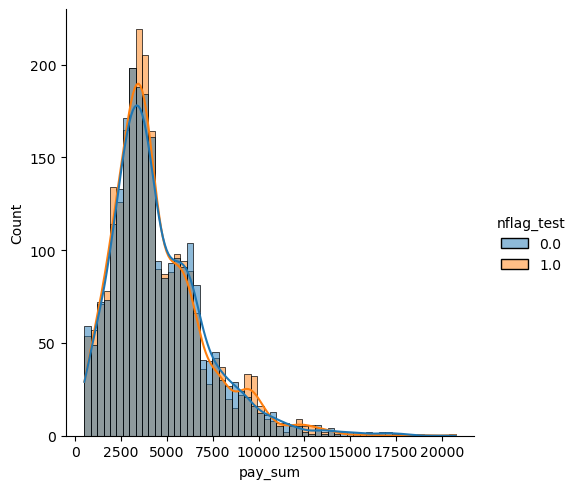

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Москва



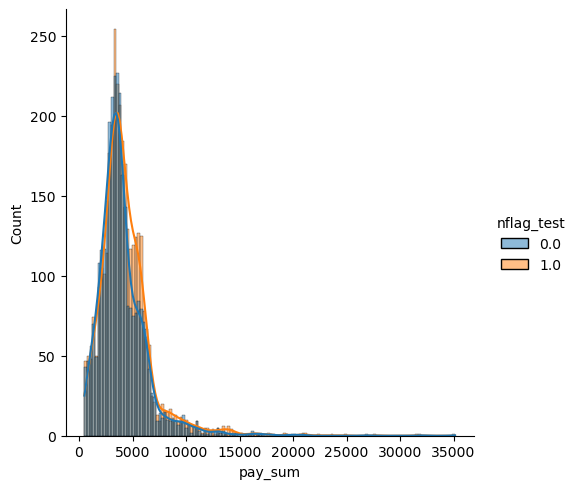

Cредние не равны
Разница средних =  381.7784892750842
Cредние не равны
Разница средних =  0.05557800593933432
Распределения не равны
Саратов



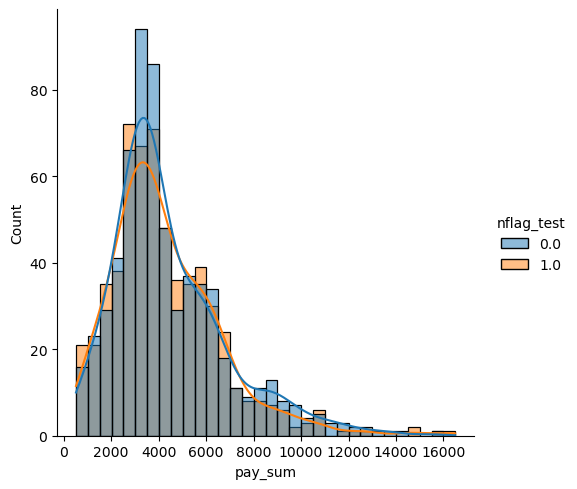

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Тольятти



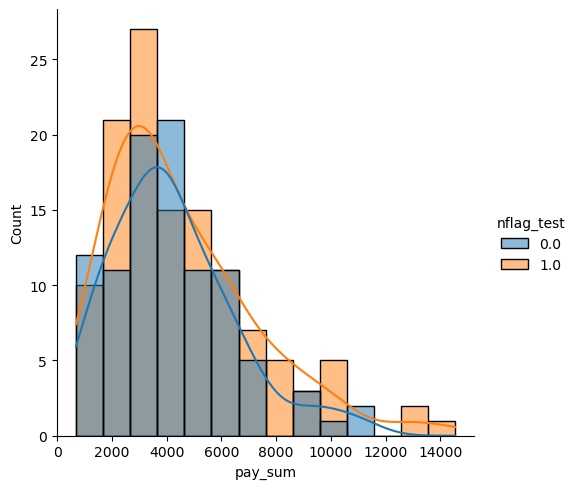

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Владимир



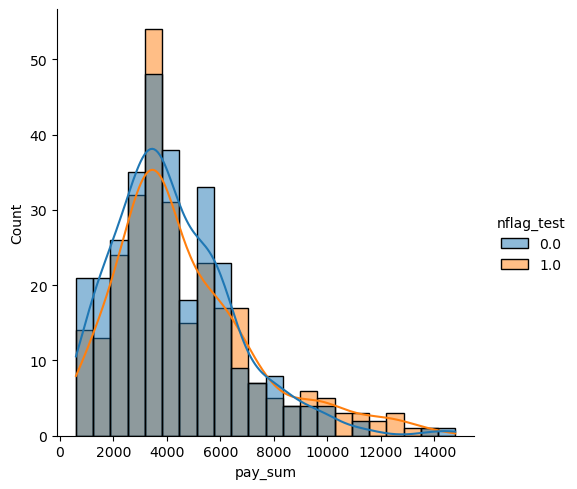

Cредние не равны
Разница средних =  438.6098419243094
Cредние равны
Разница средних = 0
Распределения не равны
Мурманск



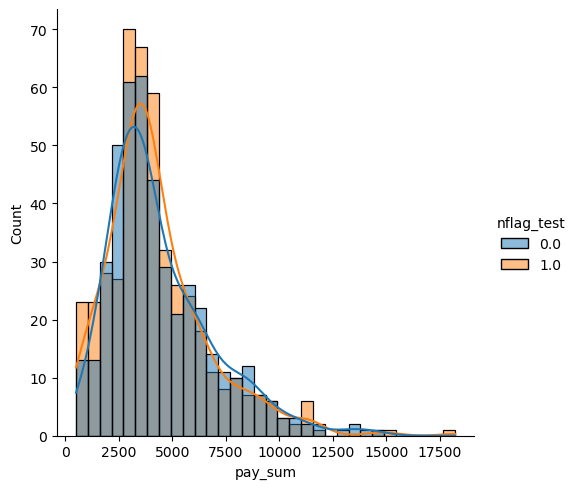

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Красноярск



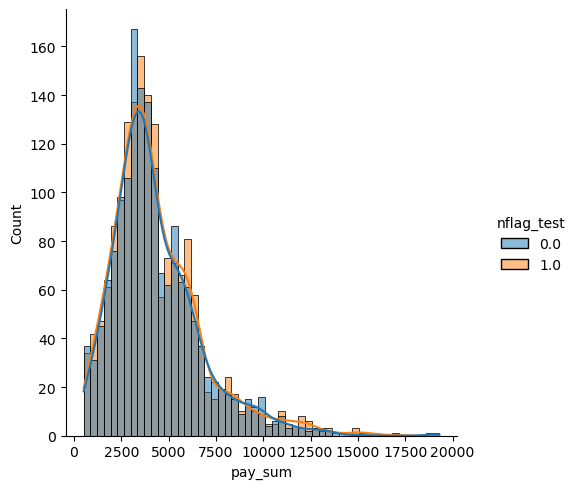

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Казань



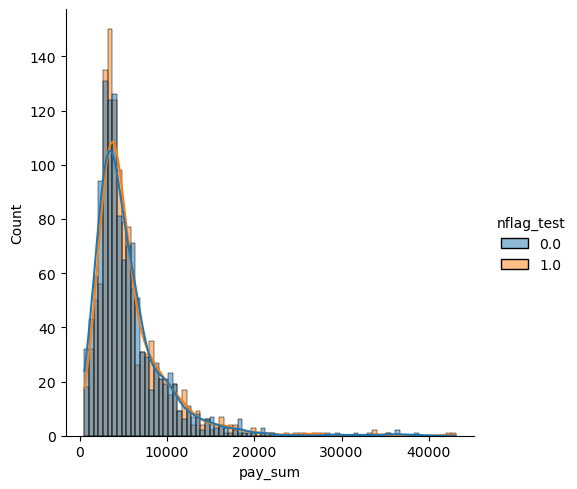

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Самара



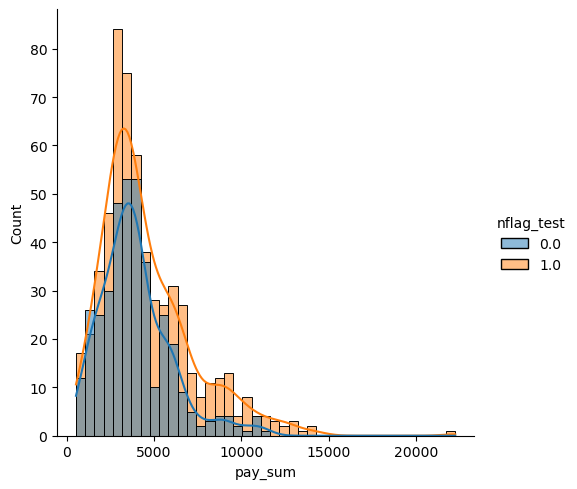

Cредние не равны
Разница средних =  1544.3720191247648
Cредние не равны
Разница средних =  0.2772412939282998
Распределения не равны
Волгоград



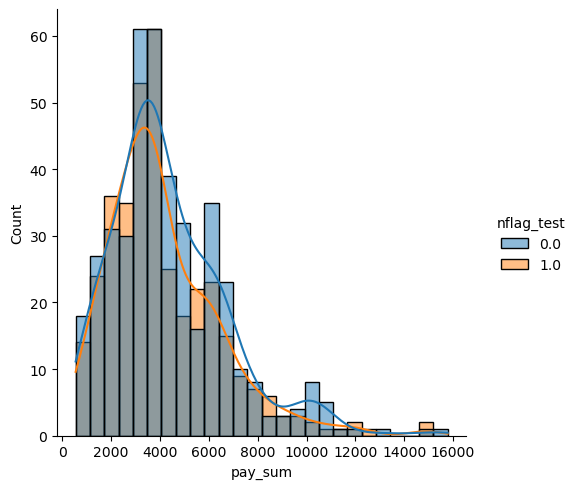

Cредние не равны
Разница средних =  -312.89040013337035
Cредние равны
Разница средних = 0
Распределения не равны
Сочи



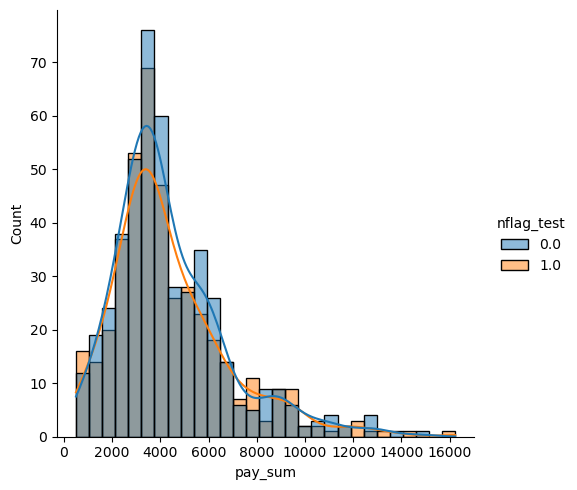

Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  -0.04931605920420967
Распределения равны
Краснодар



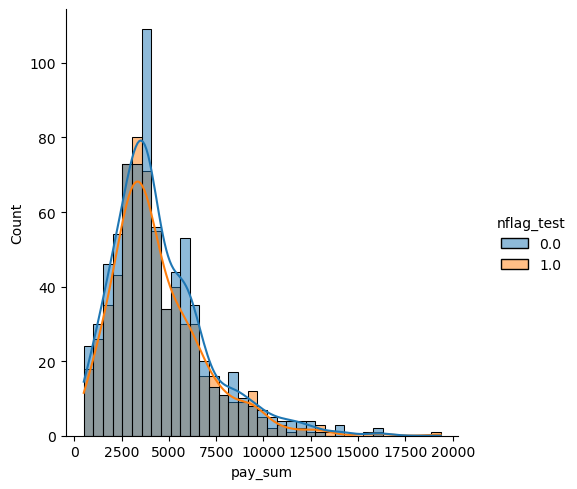

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Дмитров



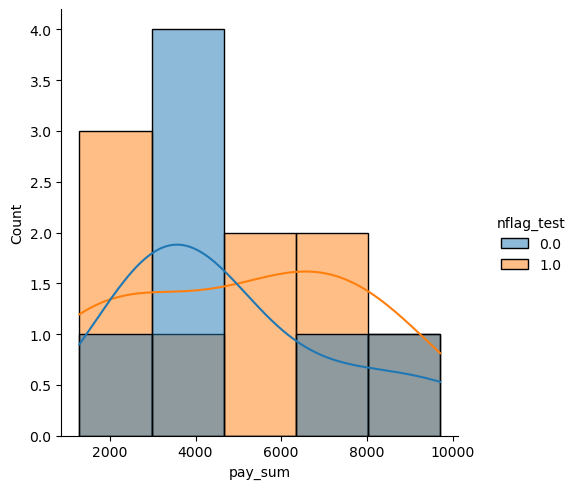

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Тюмень



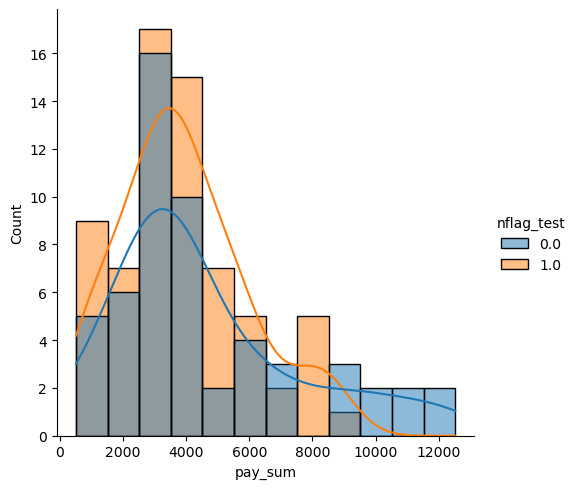

Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  0.1463645943097998
Распределения не равны
Сахалинск



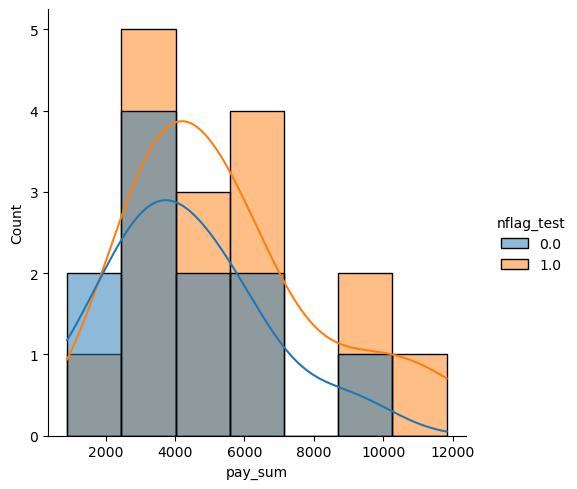

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны


In [38]:
for i in all_city:
    print(i)
    print()
    df_city = df_cl_city[df_cl_city['city']==i]
    
    sns.displot(df_city[df_city['pay_sum'] > 0], x = 'pay_sum', hue = 'nflag_test', kde = True)
    plt.show()
    
    test_calc(df_city[df_city['nflag_test']==1]['pay_sum'], df_city[df_city['nflag_test']==0]['pay_sum'])
    test_calc(df_city[df_city['nflag_test']==1]['flag_paid'], df_city[df_city['nflag_test']==0]['flag_paid'])
    mann_whitney_func(df_city[df_city['nflag_test']==1]['pay_sum'], df_city[df_city['nflag_test']==0]['pay_sum'])

#### 7 Отчет по АБ Тесту
#### Создаем пустой датафрейм. Запускаем цикл по всем торговым точкам.

Санкт-Петербург

id_trading_point =  453.0


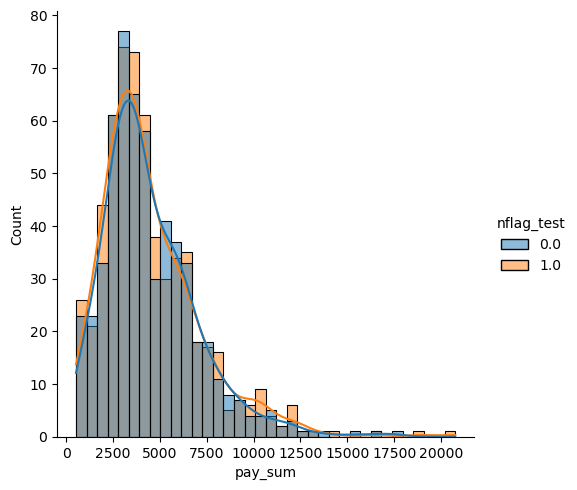

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  112.0


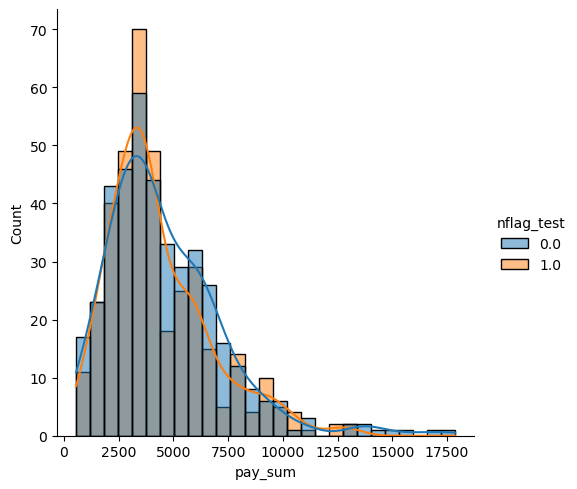

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  117.0


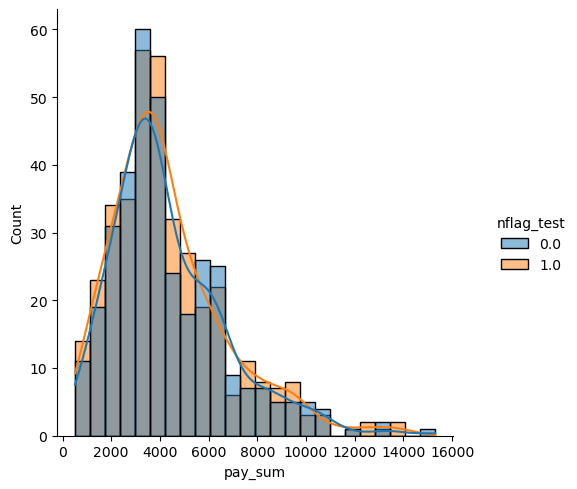

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  309.0


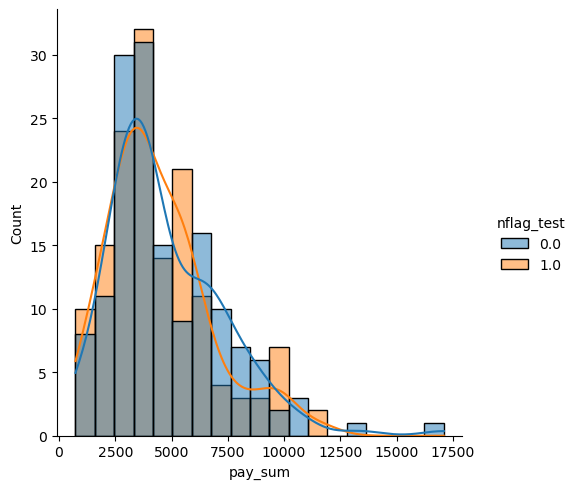

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  576.0


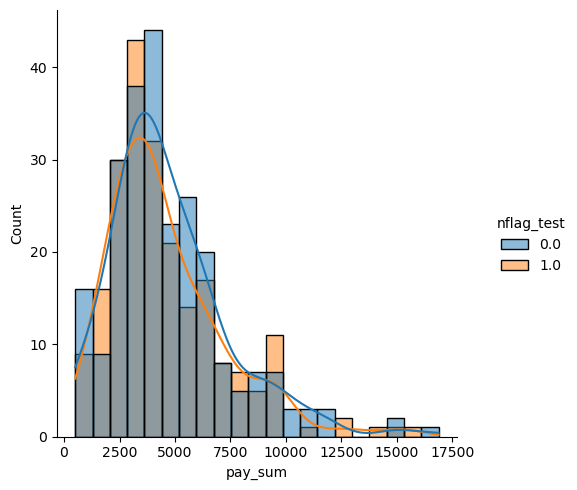

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  900.0


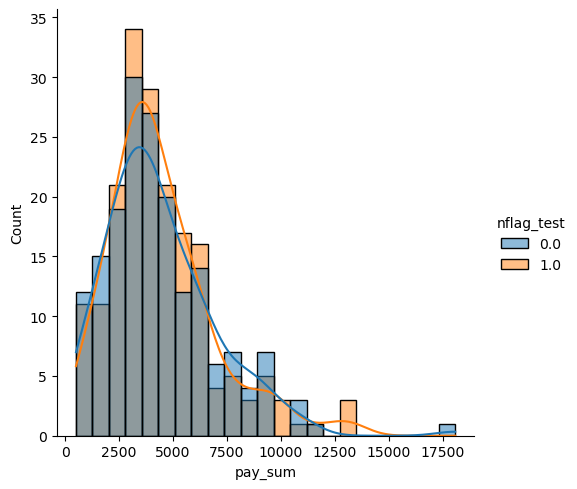

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  213.0


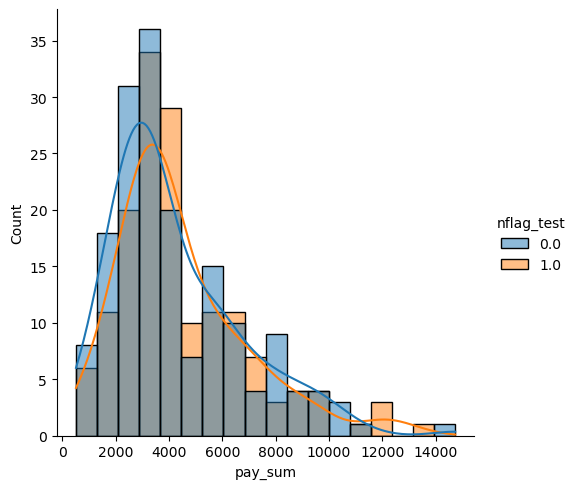

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  801.0


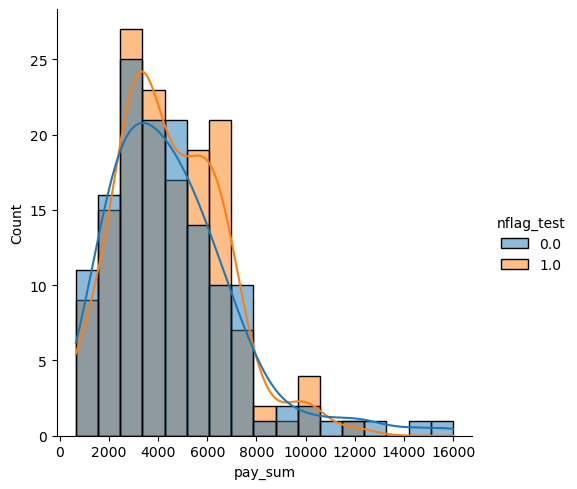

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  573.0


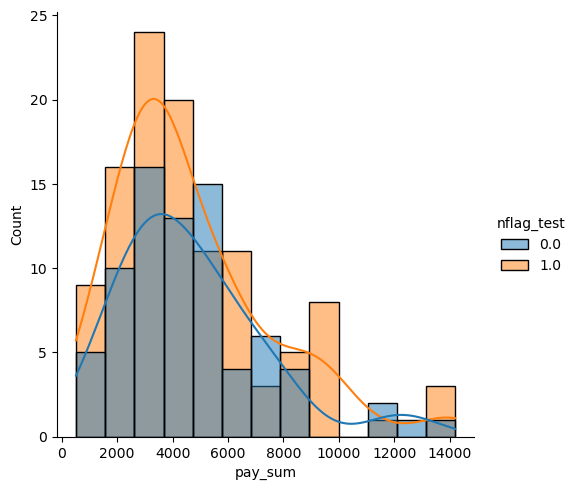

Cредние не равны
Разница средних =  676.6951977401131
Cредние не равны
Разница средних =  0.1458686440677966
Распределения не равны
id_trading_point =  891.0


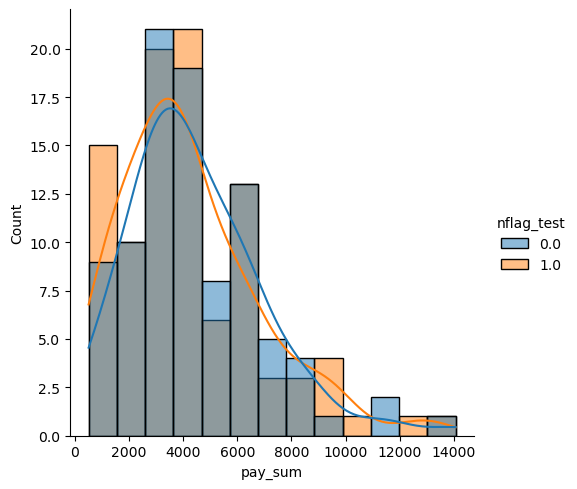

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  394.0


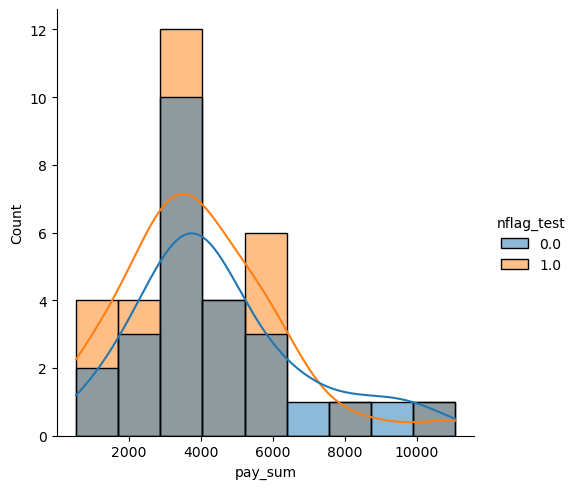

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Москва

id_trading_point =  2652.0


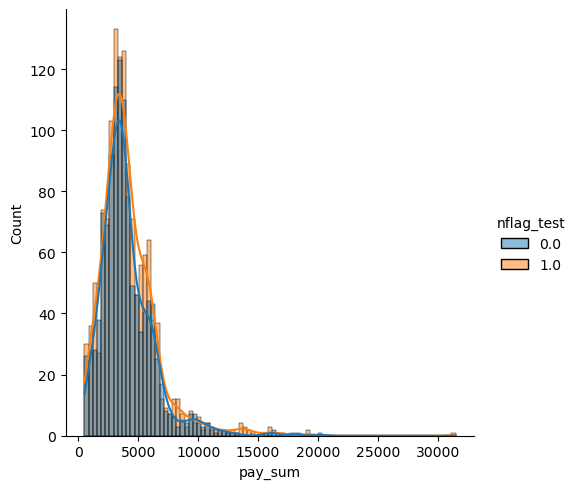

Cредние не равны
Разница средних =  533.7691266583877
Cредние не равны
Разница средних =  0.1083107326698855
Распределения не равны
id_trading_point =  3786.0


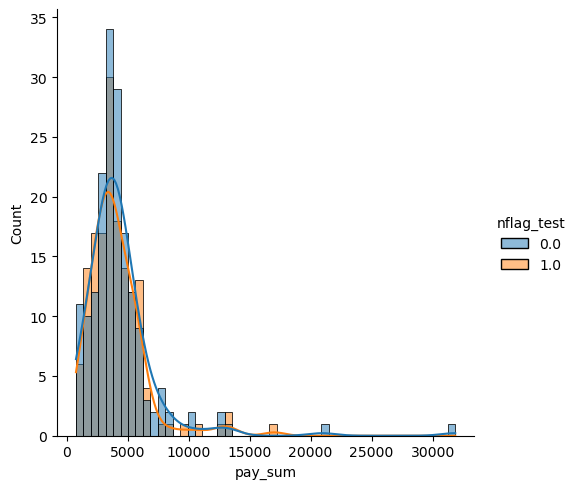

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  1287.0


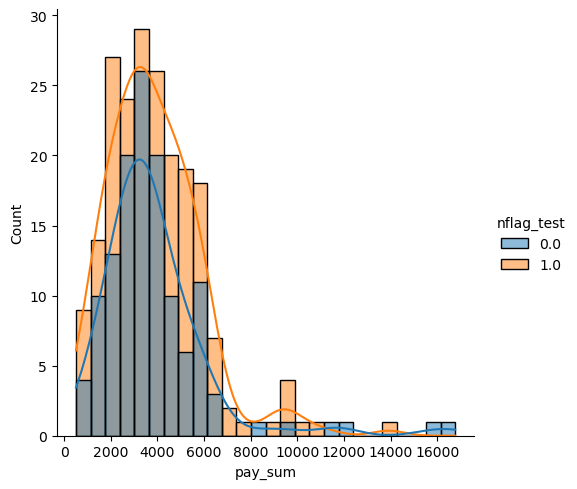

Cредние не равны
Разница средних =  733.901294571883
Cредние не равны
Разница средних =  0.19000681353622534
Распределения не равны
id_trading_point =  1654.0


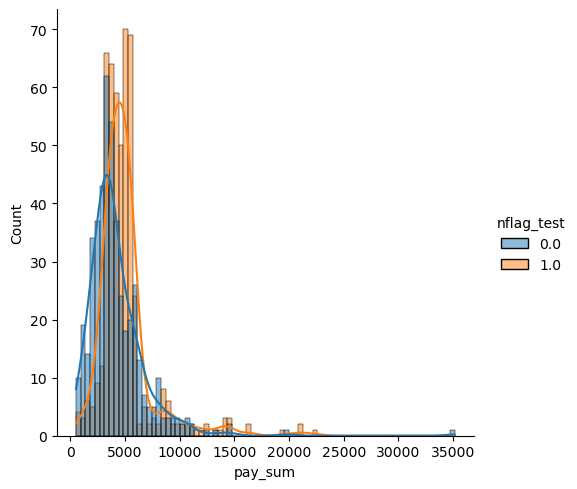

Cредние не равны
Разница средних =  624.4151754208888
Cредние равны
Разница средних = 0
Распределения не равны
id_trading_point =  3987.0


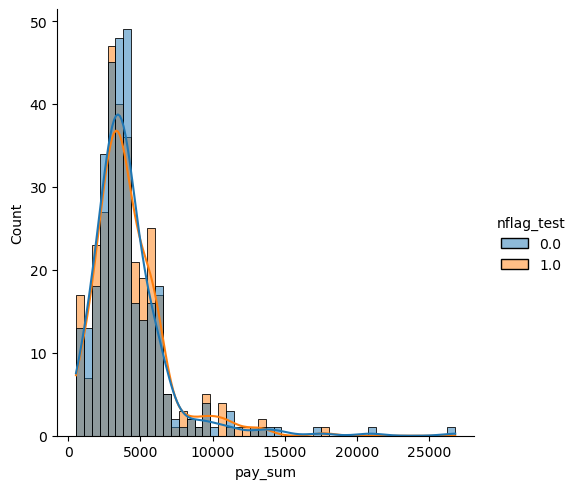

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  2212.0


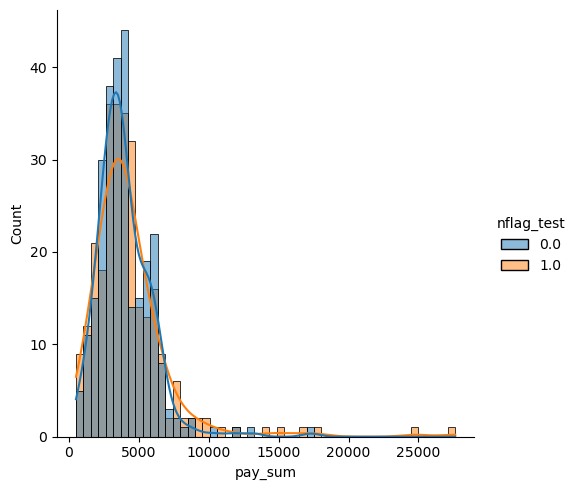

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  8543.0


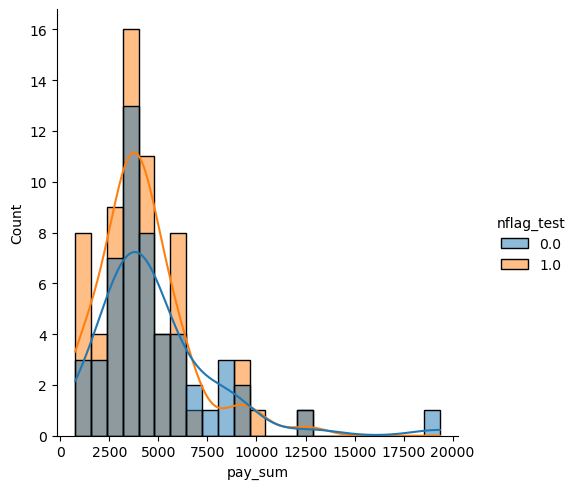

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  6543.0


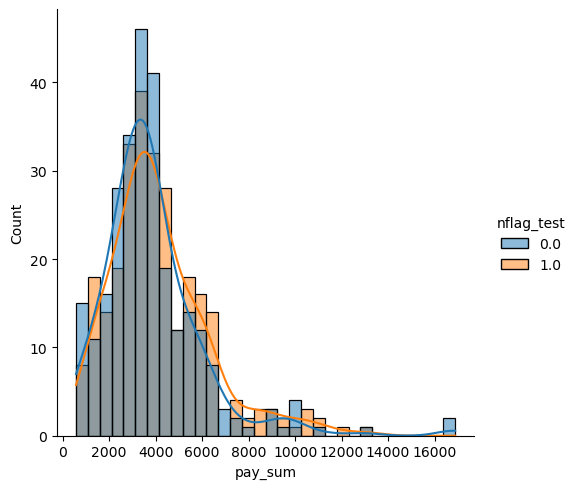

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  9121.0


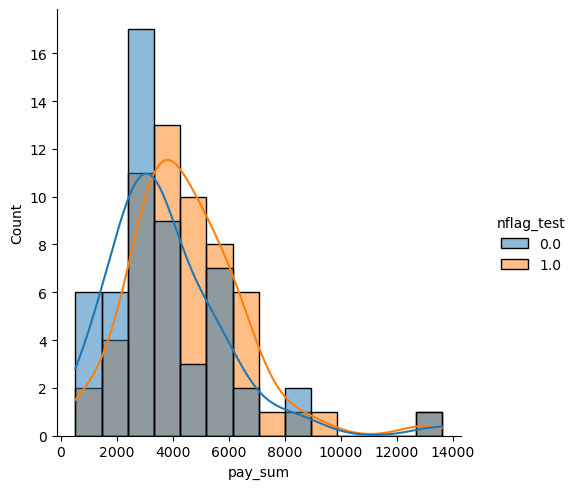

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  1002.0


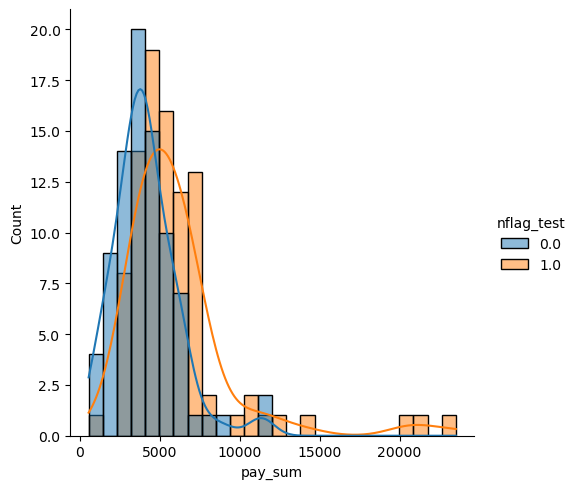

Cредние не равны
Разница средних =  2276.966389145853
Cредние не равны
Разница средних =  0.23435090965155725
Распределения не равны
id_trading_point =  9931.0


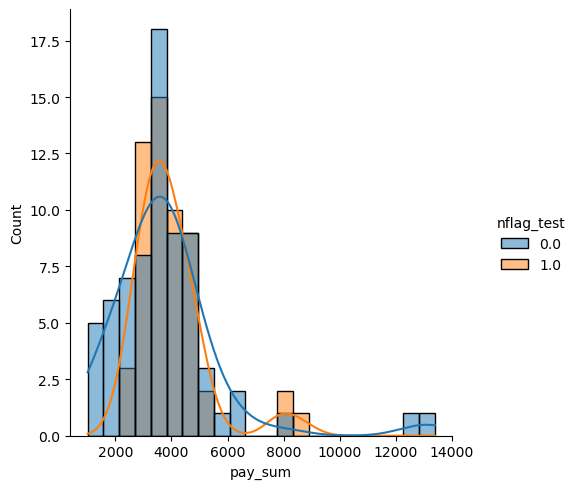

Cредние не равны
Разница средних =  -552.909116931444
Cредние не равны
Разница средних =  -0.15877105099947525
Распределения не равны
Саратов

id_trading_point =  80.0


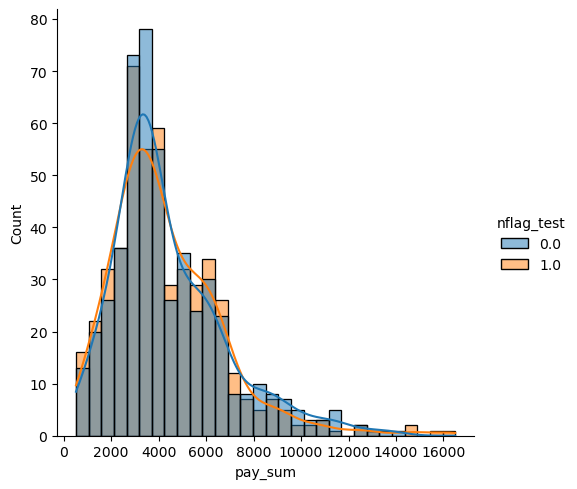

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  82.0


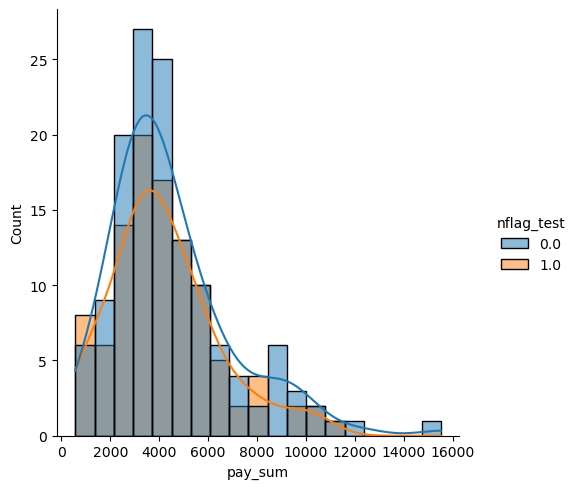

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Тольятти

id_trading_point =  88.0


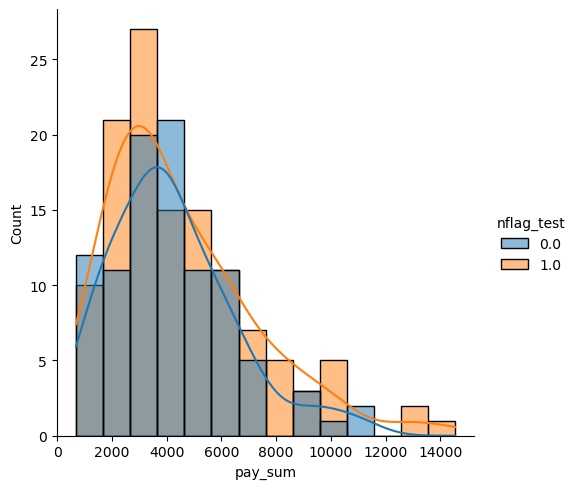

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Владимир

id_trading_point =  11.0


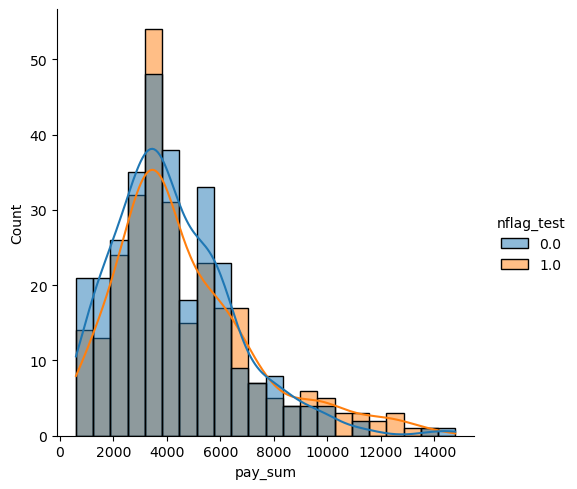

Cредние не равны
Разница средних =  438.6098419243094
Cредние равны
Разница средних = 0
Распределения не равны
Мурманск

id_trading_point =  55.0


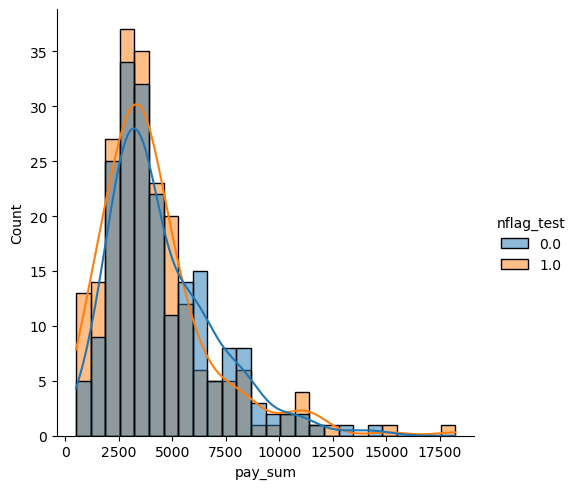

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  54.0


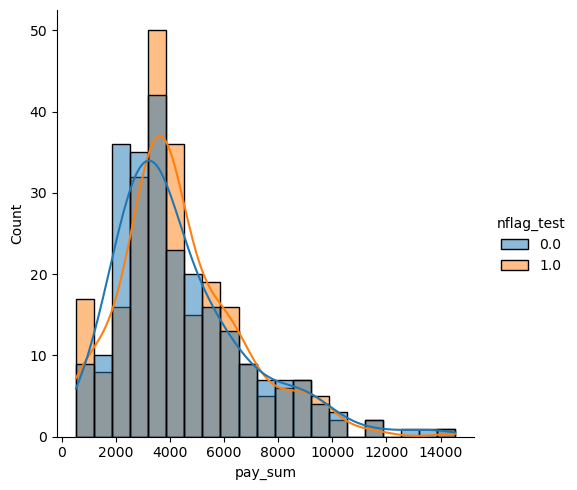

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Красноярск

id_trading_point =  212.0


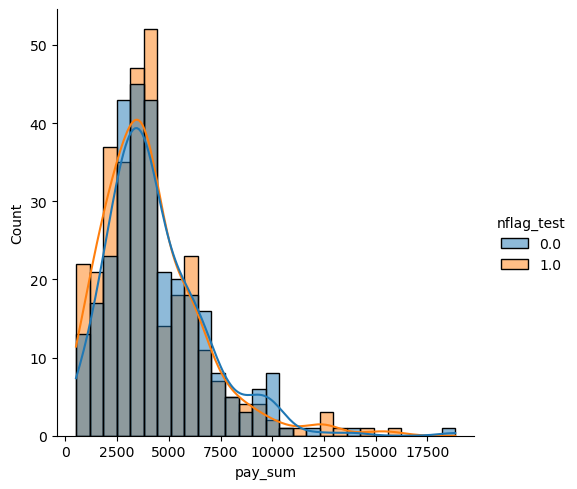

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  277.0


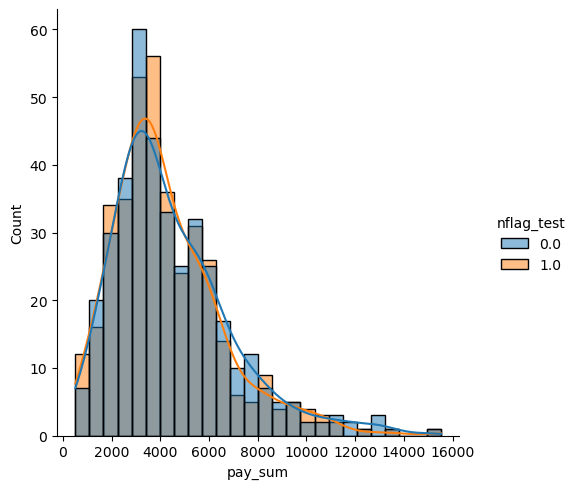

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  202.0


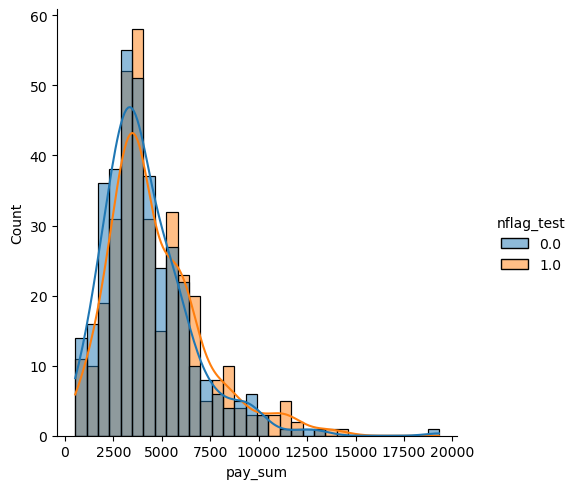

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  444.0


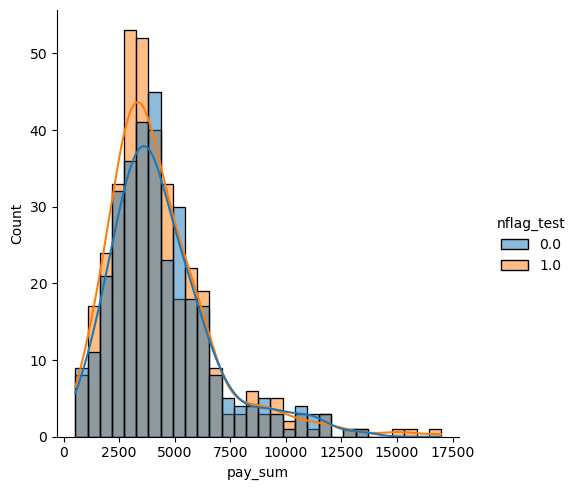

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  278.0


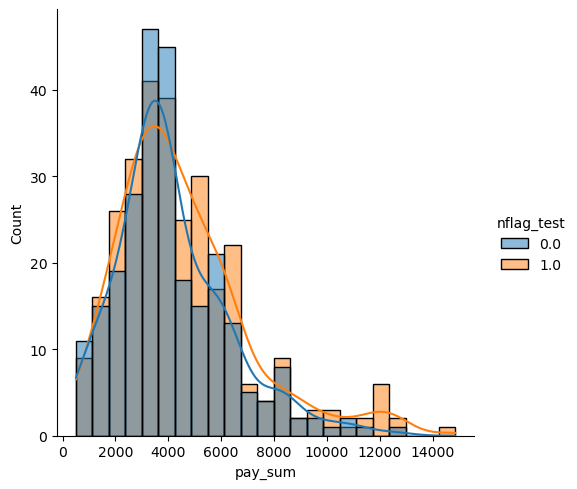

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Казань

id_trading_point =  477.0


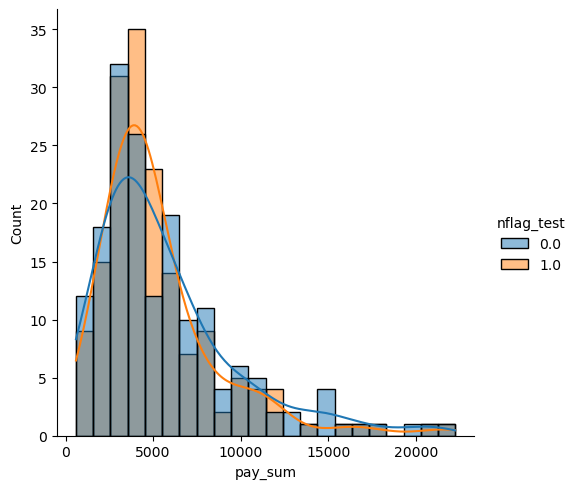

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  439.0


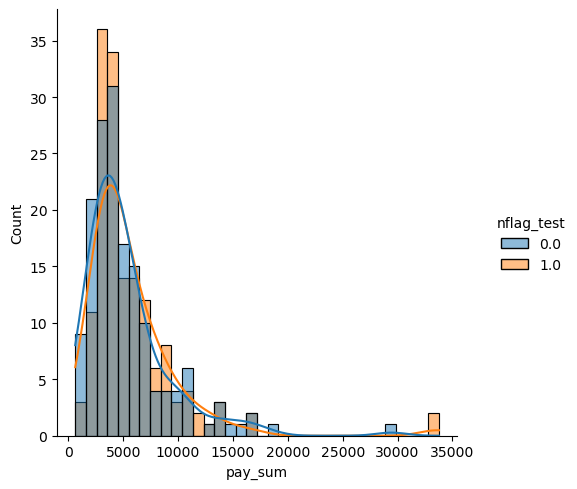

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  544.0


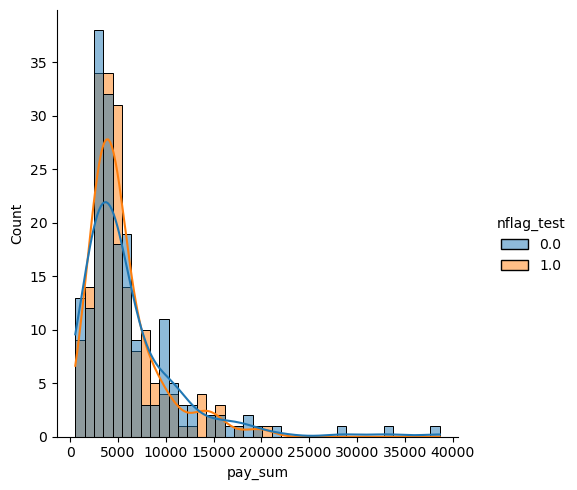

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  699.0


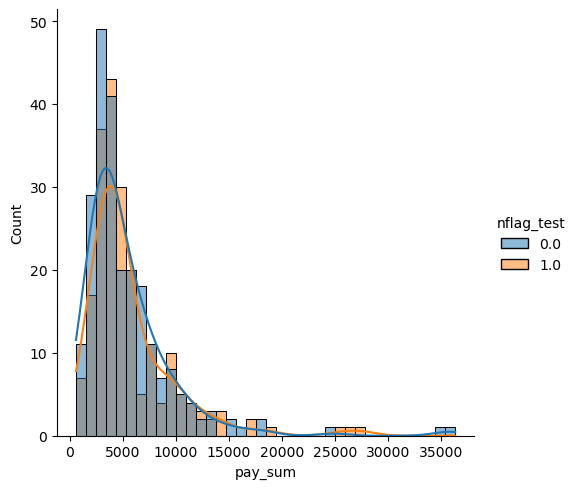

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  991.0


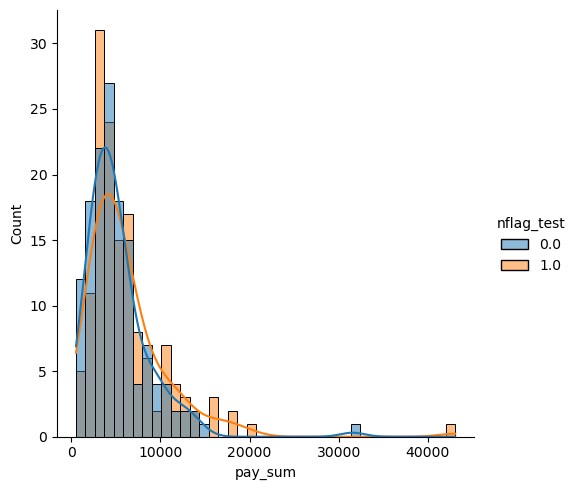

Cредние не равны
Разница средних =  796.2950869236583
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  516.0


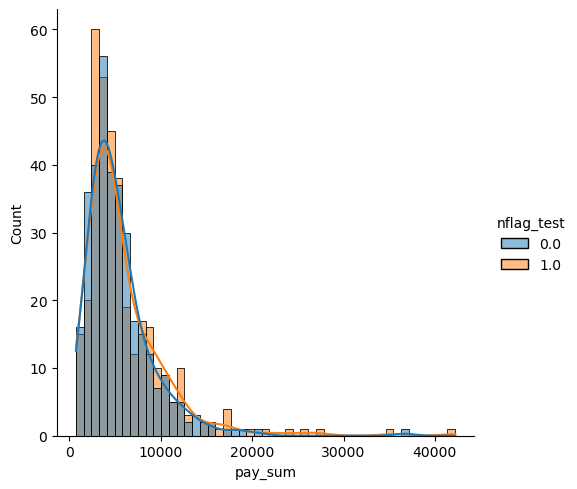

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Самара

id_trading_point =  33.0


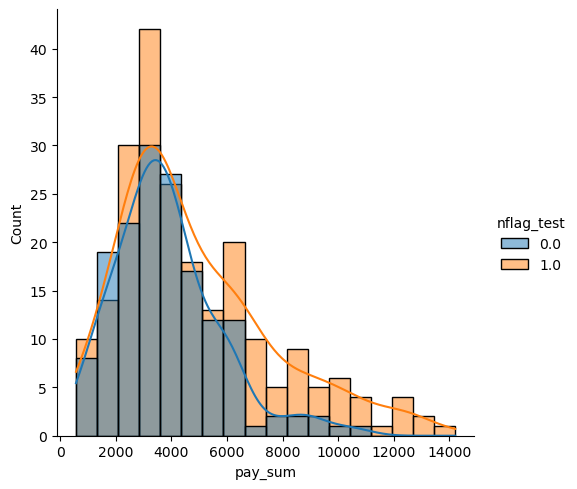

Cредние не равны
Разница средних =  2286.832230686982
Cредние не равны
Разница средних =  0.3436246992782679
Распределения не равны
id_trading_point =  34.0


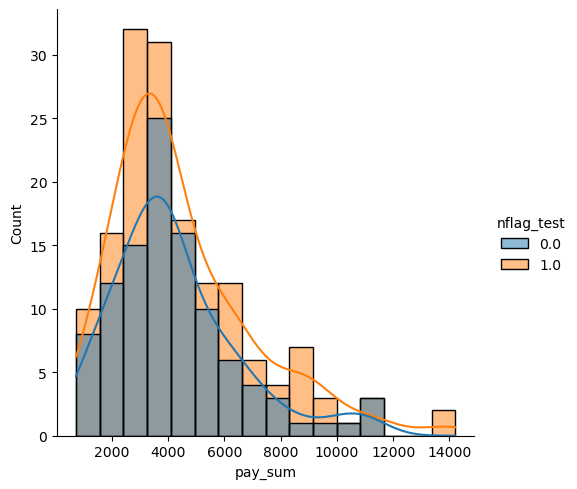

Cредние не равны
Разница средних =  1351.8979710144927
Cредние не равны
Разница средних =  0.27831357048748356
Распределения не равны
id_trading_point =  35.0


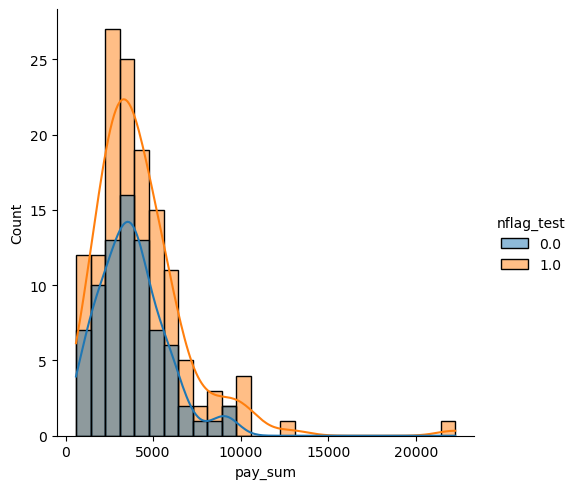

Cредние не равны
Разница средних =  1253.3892475190287
Cредние не равны
Разница средних =  0.24747085461027074
Распределения не равны
id_trading_point =  36.0


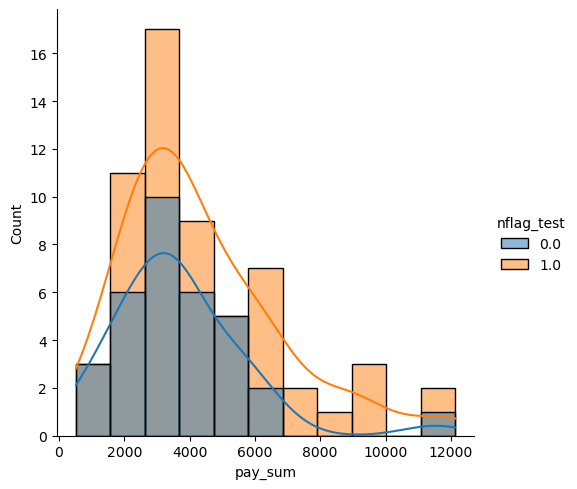

Cредние не равны
Разница средних =  1126.909804558497
Cредние не равны
Разница средних =  0.22397271398408314
Распределения не равны
Волгоград

id_trading_point =  66.0


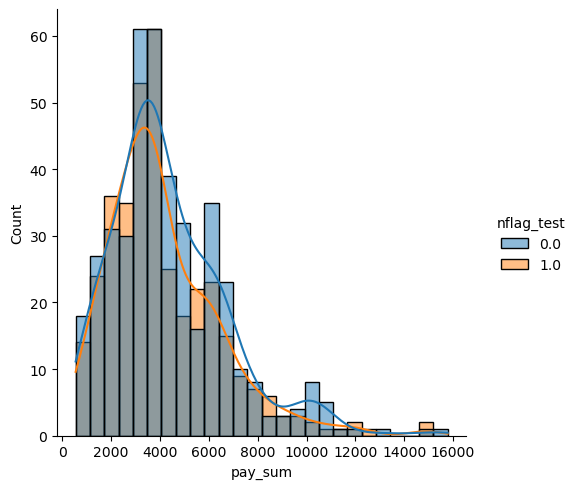

Cредние не равны
Разница средних =  -312.89040013337035
Cредние равны
Разница средних = 0
Распределения не равны
Сочи

id_trading_point =  72.0


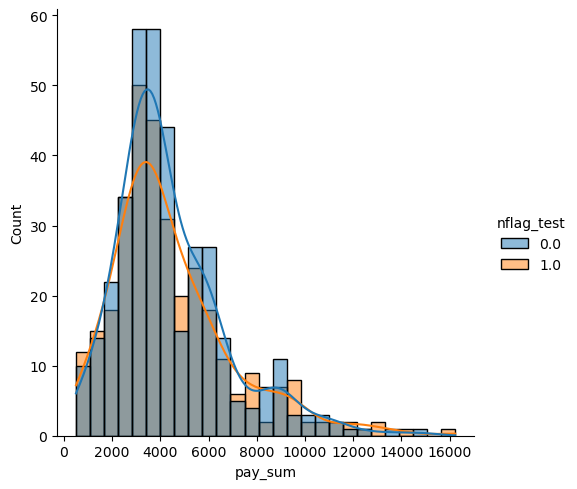

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
id_trading_point =  73.0


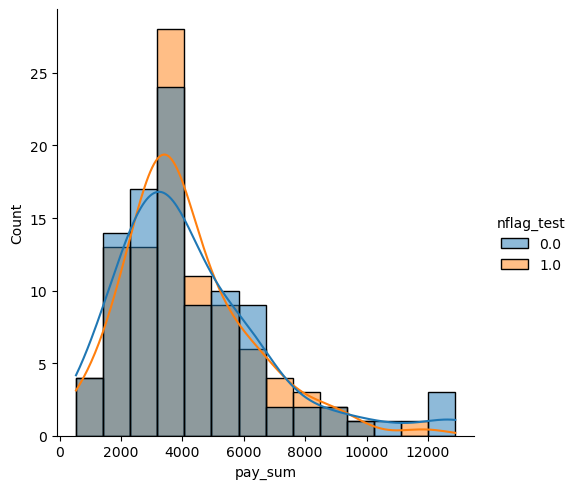

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Краснодар

id_trading_point =  1101.0


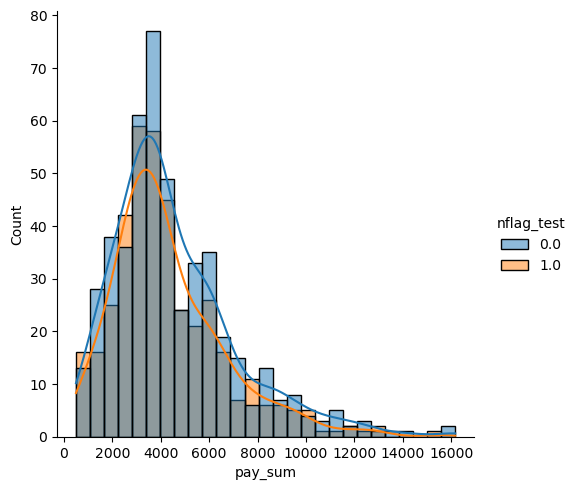

Cредние не равны
Разница средних =  -347.5750045810032
Cредние не равны
Разница средних =  -0.05250342659034102
Распределения не равны
id_trading_point =  1989.0


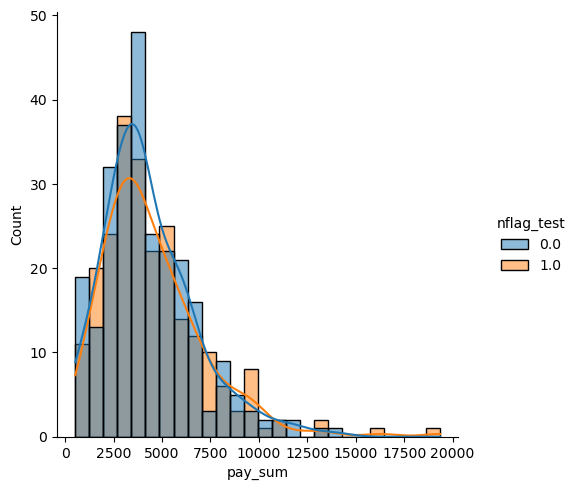

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Дмитров

id_trading_point =  2.0


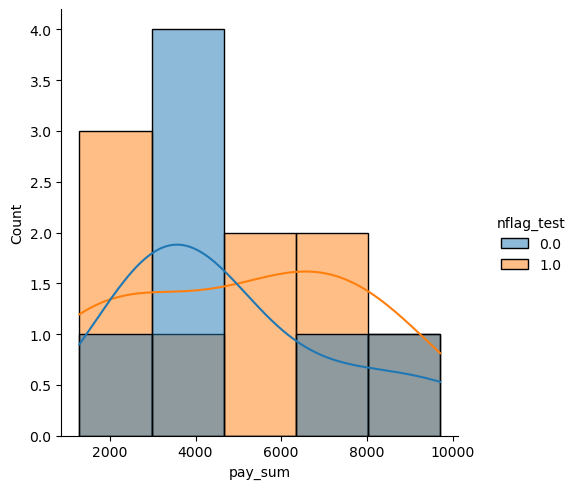

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны
Тюмень

id_trading_point =  19.0


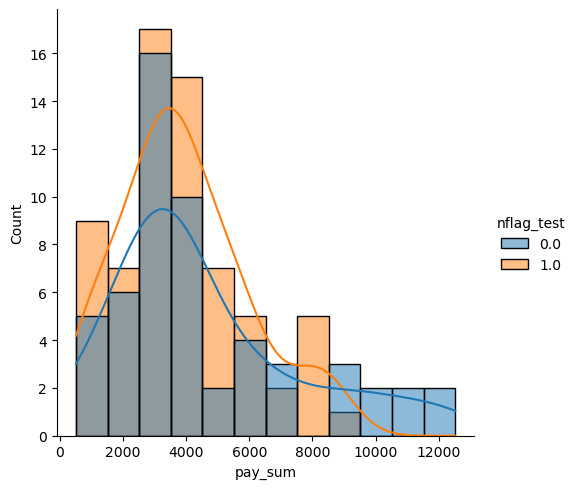

Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  0.1463645943097998
Распределения не равны
Сахалинск

id_trading_point =  69.0


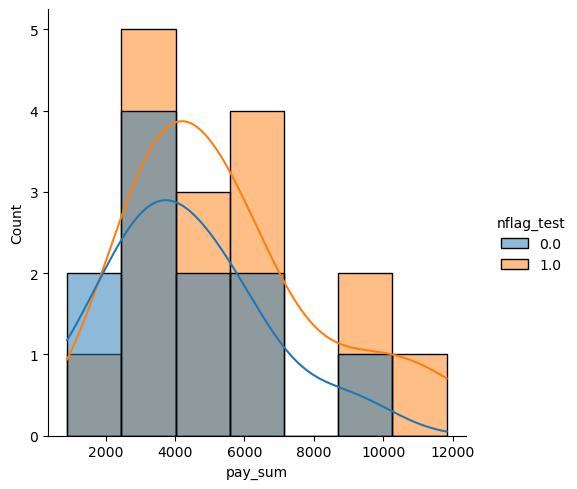

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Распределения равны


In [39]:
for i in all_city:
    print(i)
    print()
    df_city = df_cl_city[df_cl_city['city']==i]
    
    for j in df_city['id_trading_point'].unique():
        df_tp = df_city[df_city['id_trading_point']==j]
        print('id_trading_point = ', j)
        sns.displot(df_tp[df_tp['pay_sum'] > 0], x = 'pay_sum', hue = 'nflag_test', kde = True)
        plt.show()
        
        test_calc(df_tp[df_tp['nflag_test']==1]['pay_sum'], df_tp[df_tp['nflag_test']==0]['pay_sum'])
        test_calc(df_tp[df_tp['nflag_test']==1]['flag_paid'], df_tp[df_tp['nflag_test']==0]['flag_paid'])
        mann_whitney_func(df_tp[df_tp['nflag_test']==1]['pay_sum'], df_tp[df_tp['nflag_test']==0]['pay_sum'])

In [40]:
ab_results = pd.DataFrame()

for i in df_cl_city['city'].unique():
    df_tp = df_cl_city[df_cl_city['city']==i]
    
    for j in df_tp['id_trading_point'].unique():
        
        df_tp_j = df_tp[df_tp['id_trading_point']==j]
        
        count_test = len(df_tp_j[df_tp_j['nflag_test']==1])
        count_control = len(df_tp_j[df_tp_j['nflag_test']==0])
        count_all = count_test + count_control
        sigma_test = df_tp_j[df_tp_j['nflag_test']==1]['pay_sum'].std()
        sigma_control = df_tp_j[df_tp_j['nflag_test']==0]['pay_sum'].std()
        avg_payment_test = np.mean(df_tp_j[df_tp_j['nflag_test']==1]['pay_sum'])
        avg_payment_control = np.mean(df_tp_j[df_tp_j['nflag_test']==0]['pay_sum'])
        diff = avg_payment_test - avg_payment_control
        
        s_a,p_a = test_calc(df_tp_j[df_tp_j['nflag_test']==1]['pay_sum'], df_tp_j[df_tp_j['nflag_test']==0]['pay_sum'])
#        s_p,p_p = test_calc(df_tp_j[df_tp_j['nflag_test']==1]['flag_paid'], df_tp_j[df_tp_j['nflag_test']==0]['flag_paid'])
                
        ab_results = ab_results.append({'city':i,
                                        'id_trading_point':j,
                                        'count_test':count_test,
                                        'count_control':count_control,
                                        'count_all':count_all,
                                        'avg_payment_test':avg_payment_test,
                                        'avg_payment_control':avg_payment_control,
                                        'diff':diff,
                                        'sigma_test':sigma_test,
                                        'sigma_control':sigma_control,
                                        'ttest':s_a,
                                        'pvalue_ttest':p_a,
#                                        'pr_ttest_s':s_p \
                                       }, ignore_index=True)

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  676.6951977401131
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  533.7691266583877
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  733.901294571883
Cредние не равны
Разница средних =  624.4151754208888
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  2276.966389145853
Cредние не равны
Разница средних =  -552.909116931444
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние не равны
Разница средни

C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipyke

Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  796.2950869236583
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  2286.832230686982
Cредние не равны
Разница средних =  1351.8979710144927
Cредние не равны
Разница средних =  1253.3892475190287
Cредние не равны
Разница средних =  1126.909804558497
Cредние не равны
Разница средних =  -312.89040013337035
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние не равны
Разница средних =  -347.5750045810032
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0
Cредние равны
Разница средних = 0


C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipykernel_1748\1080907865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ab_results = ab_results.append({'city':i,
C:\Users\пк\AppData\Local\Temp\ipyke

In [41]:
ab_results

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,81.550595,2993.442540,2890.088044,0.637238,5.240386e-01
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,-288.126551,2778.179183,3057.040898,-1.799588,7.215174e-02
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,-9.789282,2835.004503,2813.867330,-0.060294,9.519316e-01
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,-297.510749,2814.939849,3077.161555,-1.103047,2.705641e-01
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,-165.860296,2683.727211,2815.093171,-1.080998,2.799008e-01
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,151.222716,2865.607356,2878.774167,0.684416,4.939479e-01
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,120.570487,2905.494362,2845.245598,0.462369,6.440239e-01
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,-55.013438,2774.292063,3049.074475,-0.197457,8.435623e-01
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,676.695198,3201.098137,2975.544726,2.003598,4.591805e-02
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,123.494596,2899.782464,2893.862408,0.384755,7.006710e-01


In [42]:
ab_results['percent_count']=(ab_results['count_all']/ab_results['count_all'].sum())
ab_results

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,81.550595,2993.442540,2890.088044,0.637238,5.240386e-01,0.046670
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,-288.126551,2778.179183,3057.040898,-1.799588,7.215174e-02,0.029458
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,-9.789282,2835.004503,2813.867330,-0.060294,9.519316e-01,0.026744
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,-297.510749,2814.939849,3077.161555,-1.103047,2.705641e-01,0.010548
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,-165.860296,2683.727211,2815.093171,-1.080998,2.799008e-01,0.028399
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,151.222716,2865.607356,2878.774167,0.684416,4.939479e-01,0.014917
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,120.570487,2905.494362,2845.245598,0.462369,6.440239e-01,0.010746
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,-55.013438,2774.292063,3049.074475,-0.197457,8.435623e-01,0.009643
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,676.695198,3201.098137,2975.544726,2.003598,4.591805e-02,0.007436
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,123.494596,2899.782464,2893.862408,0.384755,7.006710e-01,0.007194


In [43]:
ab_results['nflagtest_diff'] = np.where((ab_results['pvalue_ttest'] < .05) & (ab_results['diff'] > 0), 'positive'
                              ,np.where((ab_results['pvalue_ttest'] < .05) & (ab_results['diff'] < 0), 'negative'
                              ,'neutral'))
ab_results

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count,nflagtest_diff
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,81.550595,2993.442540,2890.088044,0.637238,5.240386e-01,0.046670,neutral
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,-288.126551,2778.179183,3057.040898,-1.799588,7.215174e-02,0.029458,neutral
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,-9.789282,2835.004503,2813.867330,-0.060294,9.519316e-01,0.026744,neutral
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,-297.510749,2814.939849,3077.161555,-1.103047,2.705641e-01,0.010548,neutral
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,-165.860296,2683.727211,2815.093171,-1.080998,2.799008e-01,0.028399,neutral
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,151.222716,2865.607356,2878.774167,0.684416,4.939479e-01,0.014917,neutral
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,120.570487,2905.494362,2845.245598,0.462369,6.440239e-01,0.010746,neutral
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,-55.013438,2774.292063,3049.074475,-0.197457,8.435623e-01,0.009643,neutral
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,676.695198,3201.098137,2975.544726,2.003598,4.591805e-02,0.007436,positive
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,123.494596,2899.782464,2893.862408,0.384755,7.006710e-01,0.007194,neutral


In [44]:
pip install xlsxwriter 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import xlsxwriter

In [47]:
writer = pd.ExcelWriter('Калькулятор SkyLenta.xlsx', engine="xlsxwriter")

ab_results[ab_results['nflagtest_diff']=='positive'].to_excel(writer, sheet_name='Положительные исходы', index=False)
ab_results[ab_results['nflagtest_diff']=='negative'].to_excel(writer, sheet_name='Отрицательные исходы', index=False)
ab_results[ab_results['nflagtest_diff']=='neutral'].to_excel(writer, sheet_name='Нейтральные исходы', index=False)

writer.close()